In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from pymongo import MongoClient
import matplotlib.pyplot as plt

In [7]:
client = MongoClient('localhost', 27017)
db = client.TFE
collection = db.results2

In [8]:
res = [res for res in collection.find({'model' : 'Attention LSTM 1.2', 'finish' : True, 'params' : {'$exists' : True}})]

In [10]:
res[1]['params']

[{'SEQ_LENGTH': 10,
  'EMBEDDING_DIM': 300,
  'HIDDEN': 5,
  'LAYERS': 1,
  'DROPOUT': 0.25,
  'BATCH_SIZE': 128,
  'EPOCHS': 200}]

In [11]:
def getBestRecall(epochs):
    currentBest = 0
    currentBestEpoch = 0
    for i, epoch in enumerate(epochs):
        if epoch['valid']['recall'] > currentBest:
            currentBest = epoch['valid']['recall']
            currentBestEpoch = i
    return epochs[currentBestEpoch]

In [12]:
def expoAverage(array, alpha):
    newArray = [0.0 for i in range(0, len(array))]
    newArray[0] = array[0]
    for i in range(1, len(array)):
        newArray[i] = alpha * array[i] + (1-alpha) * newArray[i-1]
    return newArray

In [16]:
def generateFromCM(cm):
    tn, fp, fn, tp = cm
    y_true = ['fake' for i in range(0, tn + fp)]
    y_pred = ['fake' for i in range(0, tn)]+['reliable' for i in range(0, fp)]
    y_true = y_true + ['reliable' for i in range(0, fn + tp)]
    y_pred = y_pred + ['fake' for i in range(0, fn)] + ['reliable' for i in range(0, tp)]

In [17]:
def precision(confMat):
    tn, fp, fn, tp = confMat
    return tp / (tp + fp)

def recall(confMat):
    tn, fp, fn, tp = confMat
    return tp / (tp + fn)

def f1(confMat):
    return 2 * (precision(confMat) * recall(confMat)) / (precision(confMat) + recall(confMat))

In [14]:
f1(res[20]['result'][94]['valid']['Confusion Matrix'])

0.6446886446886447

In [15]:
getBestRecall(res[20]['result'])

{'epoch': 76,
 'train': {'accuracy': 0.92900390625,
  'loss': 1822.4688172340393,
  'recall': 0.9153801502705164,
  'Confusion Matrix': [5409, 343, 384, 4104]},
 'valid': {'accuracy': 0.5191761363636364,
  'recall': 0.8441626119476257,
  'Confusion Matrix': [191, 540, 105, 572]}}

In [166]:
bestRes = [[getBestRecall(tmp['result']), tmp['params'], tmp['experiment_id']] for tmp in res]

In [167]:
bestRes[0]

[{'epoch': 0,
  'train': {'accuracy': 0.51591796875,
   'loss': 7407.2827072143555,
   'recall': 0.3356703171573959,
   'Confusion Matrix': [3777, 1975, 2982, 1506]},
  'valid': {'accuracy': 0.48792613636363635,
   'recall': 0.2838726286791563,
   'Confusion Matrix': [494, 237, 484, 193]}},
 [{'SEQ_LENGTH': 2,
   'EMBEDDING_DIM': 5,
   'HIDDEN': 5,
   'LAYERS': 1,
   'DROPOUT': 0.0,
   'BATCH_SIZE': 128,
   'EPOCHS': 200}],
 2]

In [168]:
bestRes = sorted(bestRes, key = lambda x: (x[0]['valid']['Confusion Matrix'][1]), reverse=False)

In [169]:
bestRes

[[{'epoch': 199,
   'train': {'accuracy': 0.579296875,
    'loss': 7253.635223388672,
    'recall': 0.16292787611148976,
    'Confusion Matrix': [5199, 553, 3755, 733]},
   'valid': {'accuracy': 0.521182528409091,
    'recall': 0.17192984877754472,
    'Confusion Matrix': [640, 91, 561, 116]}},
  [{'SEQ_LENGTH': 2,
    'EMBEDDING_DIM': 10,
    'HIDDEN': 5,
    'LAYERS': 3,
    'DROPOUT': 0.0,
    'BATCH_SIZE': 128,
    'EPOCHS': 200}],
  62],
 [{'epoch': 199,
   'train': {'accuracy': 0.579296875,
    'loss': 7253.635223388672,
    'recall': 0.16292787611148976,
    'Confusion Matrix': [5199, 553, 3755, 733]},
   'valid': {'accuracy': 0.521182528409091,
    'recall': 0.17192984877754472,
    'Confusion Matrix': [640, 91, 561, 116]}},
  [{'SEQ_LENGTH': 2,
    'EMBEDDING_DIM': 10,
    'HIDDEN': 5,
    'LAYERS': 3,
    'DROPOUT': 0.25,
    'BATCH_SIZE': 128,
    'EPOCHS': 200}],
  63],
 [{'epoch': 199,
   'train': {'accuracy': 0.579296875,
    'loss': 7253.635223388672,
    'recall': 0.162

In [56]:
recall = 0
ind = 0
for i, bestR in enumerate(bestRes):
    if bestR['valid']['recall'] > recall:
        recall = bestR['valid']['recall']
        ind = i

In [57]:
recall

1.0

In [58]:
ind

10

In [60]:
bestRes[10]

{'epoch': 169,
 'train': {'accuracy': 0.6396484375,
  'loss': 6503.404205322266,
  'recall': 0.5127334047551558,
  'Confusion Matrix': [4254, 1498, 2192, 2296]},
 'valid': {'accuracy': 0.5191761363636364,
  'recall': 1.0,
  'Confusion Matrix': [0, 731, 0, 677]}}

In [61]:
valid_rec = [res['valid']['recall'] for res in bestRes]

In [62]:
valid_rec

[0.6043659183950406,
 0.6395366827963501,
 0.6281227206150551,
 0.6506966167861342,
 0.6609704867924592,
 0.798087466442001,
 0.7221377522695371,
 0.8036182336698009,
 0.8832250209942605,
 0.8089521358347537,
 1.0,
 0.5027735873129818,
 0.9703499763595613,
 0.45302816603275264,
 0.6564510962248241,
 0.7047730033754126,
 0.6759672219503264,
 0.6881461655631448,
 0.7018313668100336,
 0.8447343626888391,
 0.7870121317832623,
 0.7471787448699366,
 0.8446004128133592,
 0.7555295603849786,
 0.5566817187379486,
 0.5393990391374809,
 0.6999864711055415,
 0.4486178692867553,
 0.6510790000103566,
 0.6632937094573628,
 0.6548635837856912,
 0.6672002325789576,
 0.6239365665559189,
 0.8327496315264923,
 0.8153947335476552,
 0.9731460478454498,
 0.5817344544703875,
 0.6145801276084707,
 0.7398107267756528,
 0.4575286864162678,
 0.8951745421949315,
 0.4776875857750664]

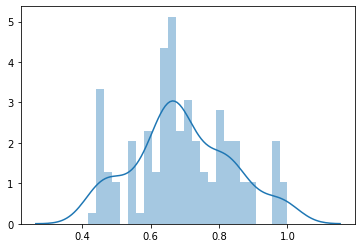

In [34]:
sns.distplot(valid_rec, bins = 25)

In [35]:
train_rec = [res['train']['recall'] for res in bestRes]

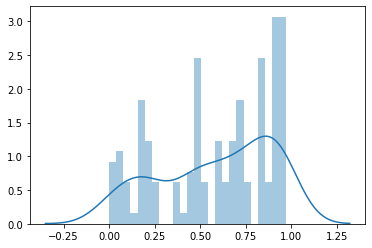

In [36]:
sns.distplot(train_rec, bins = 25)

In [99]:
train = [r['train']['recall'] for r in res[35]['result']]
valid = [r['valid']['recall'] for r in res[35]['result']]
loss = [r['train']['loss'] for r in res[35]['result']]

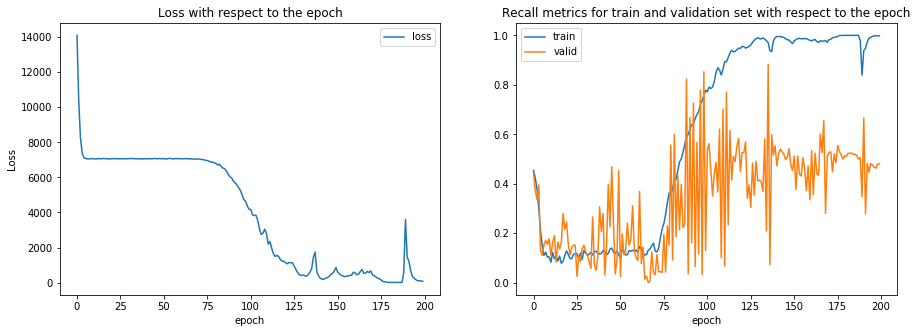

In [120]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
axes[1].plot(train, label = 'train')
axes[1].plot(valid, label = 'valid')
axes[1].set_xlabel('epoch')
axes[1].set_title('Recall metrics for train and validation set with respect to the epoch')
axes[1].legend()
axes[0].plot(loss, label = 'loss')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss with respect to the epoch')
axes[0].legend()
plt.savefig('output/attention1.pdf')

In [93]:
tn, fp, fn, tp = bestRes[60]['valid']['Confusion Matrix']

In [113]:
newValid = expoAverage(valid, 0.8)

In [114]:
newValid

[0.44236975557912256,
 0.3859709001949519,
 0.34676105881816927,
 0.38588554141393383,
 0.18207089733167042,
 0.12509061486564915,
 0.14711895372807962,
 0.16707751889556838,
 0.15728030722187625,
 0.17355788020382268,
 0.12107380422216509,
 0.1552129859494797,
 0.18389947817166605,
 0.10284634292705574,
 0.1527578121411214,
 0.13922322799837702,
 0.15881139489663273,
 0.25514204025452153,
 0.2234392438427552,
 0.24164682699029436,
 0.1723937664583168,
 0.12448863215527864,
 0.13912925236569595,
 0.1498137216119872,
 0.1509662499490944,
 0.05096438371352843,
 0.09677067459068066,
 0.08771868355540859,
 0.12772131385214364,
 0.14688509660372387,
 0.13021326574950823,
 0.1126229032429992,
 0.09136275393752447,
 0.06498191389875077,
 0.22586354402767309,
 0.10308614937589433,
 0.061132136144019196,
 0.09624420867842017,
 0.2650218945028832,
 0.21967980978165585,
 0.26745964648652815,
 0.07860563752354964,
 0.13090451003624134,
 0.34468360255756303,
 0.250285095885811,
 0.4252634838348216,